In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/Australian Vehicle Prices.csv')

In [6]:
# Data Preprocessing

# 1. Handle Missing Values
# Imputing numerical missing values with median
numerical_cols = data.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='median')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

In [8]:
# Imputing categorical missing values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])


In [9]:
# 2. Convert Categorical to Numerical
# Using Label Encoding for simplicity and to keep the dataset size manageable
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [11]:
# Correcting the feature engineering step by converting 'Engine' and 'FuelConsumption' back to strings
data['Engine'] = data['Engine'].astype(str)
data['FuelConsumption'] = data['FuelConsumption'].astype(str)


In [12]:
# Extracting numerical values from 'Engine' and 'FuelConsumption'
data['EngineSize'] = data['Engine'].str.extract('(\d+\.\d+|\d+)').astype(float)
data['FuelConsumption'] = data['FuelConsumption'].str.extract('(\d+\.\d+|\d+)').astype(float)


In [13]:
# Dropping the original columns used for feature engineering
data.drop(columns=['Engine', 'FuelConsumption'], inplace=True)

In [14]:
# Checking the first few rows of the updated dataset
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineSize
0,68,2022.0,624,509,7850,0,1,1,1,10322,670,113,7,6,5,10,2659,33.0
1,46,2022.0,495,227,7677,2,1,2,7,3756,64,80,7,3,7,8,774,26.0
2,4,2022.0,62,161,7451,2,1,4,7,12930,425,526,7,2,1,7,55,31.0
3,51,2011.0,274,161,1814,2,1,4,7,2457,715,374,10,2,1,7,1649,97.0
4,62,2022.0,127,469,7819,2,1,2,8,269,328,119,7,6,5,8,1778,24.0


In [16]:
# Normalizing the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [17]:
# Creating a new DataFrame for the processed data
processed_data = pd.DataFrame(scaled_data, columns=data.columns)
processed_data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,DriveType,FuelType,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineSize
0,1.002990,1.099728,0.918956,0.671481,1.298057,-4.426414,-0.291841,-0.638469,-1.301936,0.832614,1.047557,-1.080170,0.15736,0.086450,-0.014798,1.712253,0.946380,-0.115377
1,-0.062844,1.099728,0.319712,-1.296162,1.225888,0.319181,-0.291841,0.171918,0.559609,-0.706413,-1.530744,-1.270831,0.15736,-1.307246,1.476949,-0.031098,-0.877874,-0.458069
2,-2.097619,1.099728,-1.691707,-1.756674,1.131610,0.319181,-0.291841,1.792692,0.559609,1.443911,0.005174,1.305970,0.15736,-1.771811,-2.998292,-0.902773,-1.573703,-0.213289
3,0.179391,-0.996550,-0.706902,-1.756674,-1.219916,0.319181,-0.291841,1.792692,0.559609,-1.010890,1.239015,0.427778,1.39518,-1.771811,-2.998292,-0.902773,-0.031072,3.017800
4,0.712308,1.099728,-1.389762,0.392382,1.285125,0.319181,-0.291841,0.171918,0.869867,-1.523743,-0.407524,-1.045505,0.15736,0.086450,-0.014798,-0.031098,0.093771,-0.555980


In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

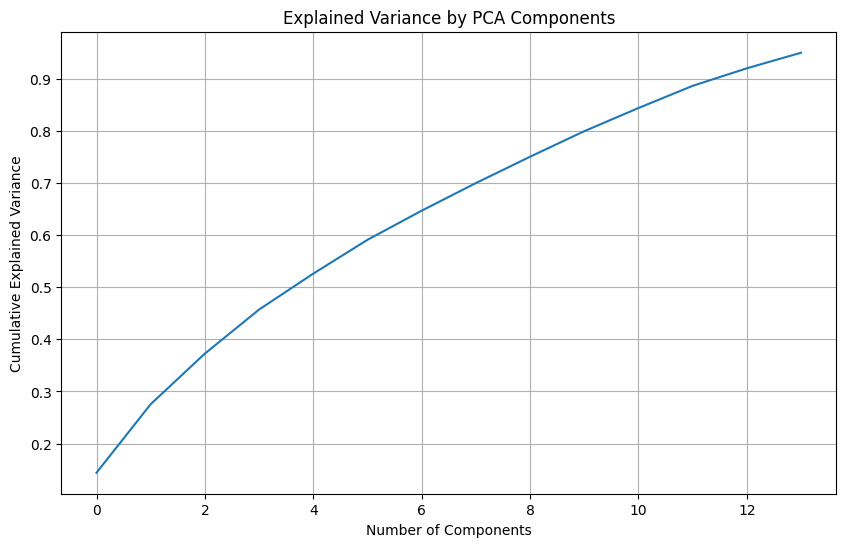

((16734, 14),
 array([0.1439315 , 0.13164267, 0.09716223, 0.08451953, 0.06902898,
        0.06490656, 0.05590144, 0.05301376, 0.0506283 , 0.04905713,
        0.0444715 , 0.04258748, 0.03366517, 0.02993086]))

In [20]:
# Imputing missing values in 'EngineSize' with median
imputer_engine_size = SimpleImputer(strategy='median')
processed_data['EngineSize'] = imputer_engine_size.fit_transform(processed_data[['EngineSize']])

# PCA for dimensionality reduction
# Choosing the number of components such that 95% of the variance is retained
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(processed_data)

# Checking the shape of the reduced data
reduced_data_shape = reduced_data.shape

# Visualizing the explained variance ratio of each component
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

reduced_data_shape, pca.explained_variance_ratio_